In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt



data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

ModuleNotFoundError: No module named 'sklearn'

In [19]:
df.head(7)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992


In [20]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_split = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Розмір тренувальної вибірки: {X_train.shape}")
print(f"Розмір тестової вибірки: {X_test.shape}")


def predict(X, coefficients):
    return np.dot(X, coefficients)

Розмір тренувальної вибірки: (14448, 8)
Розмір тестової вибірки: (6192, 8)


In [21]:
my_str = "Fil"
res = ''.join(format(ord(i), '08b') for i in my_str)
my_seed = int(res) % 12345
np.random.seed(my_seed)

best_mse = float('inf')
best_coefficients = None

In [22]:
for _ in range(10000):  
    coefficients = np.random.rand(X_train.shape[1])
    predictions = predict(X_train, coefficients)
    mse = mean_squared_error(y_train, predictions)
    
    if mse < best_mse:
        best_mse = mse
        best_coefficients = coefficients

print("Найкращі коефіцієнти:", best_coefficients)
print("Найменша середньоквадратична помилка:", best_mse)

Найкращі коефіцієнти: [0.62224906 0.35120163 0.63928978 0.36301765 0.00123193 0.38057191
 0.0940094  0.17964103]
Найменша середньоквадратична помилка: 42.51182768424148


In [23]:
y_pred_train = predict(X_train, best_coefficients)
r2_train = r2_score(y_train, y_pred_train)
print("Коефіцієнт детермінації на тренувальній вибірці:", r2_train)

Коефіцієнт детермінації на тренувальній вибірці: -30.732444076202768


In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Середньоквадратична помилка на тестовій вибірці:", mse_test)
print("Коефіцієнт детермінації на тестовій вибірці:", r2_test)

Середньоквадратична помилка на тестовій вибірці: 0.5305677824766757
Коефіцієнт детермінації на тестовій вибірці: 0.595770232606166


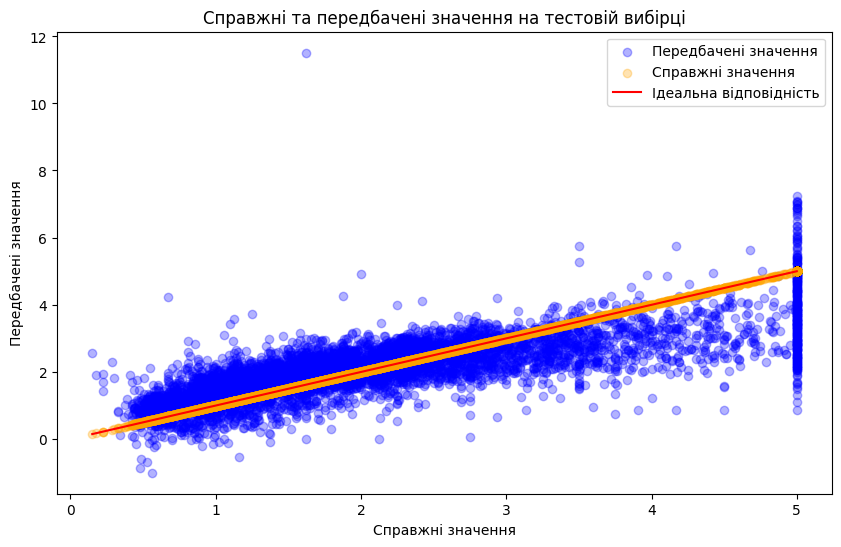

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.3, color='blue', label='Передбачені значення')
plt.scatter(y_test, y_test, alpha=0.3, color='orange', label='Справжні значення')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ідеальна відповідність')
plt.title('Справжні та передбачені значення на тестовій вибірці')
plt.xlabel('Справжні значення')
plt.ylabel('Передбачені значення')
plt.legend()
plt.show()